<a href="https://colab.research.google.com/github/andrew-mecchi/andrew-mecchi.github.io/blob/main/Sentiment_Analysis_D213_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer


import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')

In [ ]:
# Import additional packages for natural language processing

#nltk.download('all')   #download all
# Import additional packages for natural language processing
nltk.download('all')  # Includes stopwords, puncuation, lemmatizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\andrew\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\andrew\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\andrew\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\andrew\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\andrew\AppData\Roaming\nltk_data...
[nltk_data] 

True

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Import review files for amazon, imdb, and yelp
amazon = pd.read_csv(r'/content/drive/MyDrive/data_files/amazon_cells_labelled.txt', sep = "\t", header = None, index_col = False, names = ['review', 'sentiment'], engine = 'python')
imdb = pd.read_csv(r'/content/drive/MyDrive/data_files/imdb_labelled.txt', sep = "\t | \s", header = None, index_col = False, names = ['review', 'sentiment'], engine = 'python')
yelp = pd.read_csv(r'/content/drive/MyDrive/data_files/yelp_labelled.txt', sep = '\t', header = None, index_col = False, names = ['review', 'sentiment'], engine = 'python')

In [4]:
# View amazon df info and first three rows
amazon.info()
print('\n')
amazon.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB




,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1


In [5]:
# View imdb df info and first three rows
imdb.info()
print('\n')
imdb.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB




,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0


In [6]:
# View yelp df info and first three rows
yelp.info()
print('\n')
yelp.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB




,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0


In [7]:
# View counts
amazon['sentiment'].value_counts()

0    500
1    500
Name: sentiment, dtype: int64

In [8]:
# View counts
imdb['sentiment'].value_counts()

0    500
1    500
Name: sentiment, dtype: int64

In [9]:
# View counts
yelp['sentiment'].value_counts()

1    500
0    500
Name: sentiment, dtype: int64

In [ ]:
# Concatenate three review df into one df
df = pd.concat((amazon, imdb, yelp), ignore_index = True)

# View shape
print("Shape of data: ", df.shape)

# View df
df

Shape of data:  (3000, 2)


,review,sentiment
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0


In [ ]:
# Search for missing values
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [ ]:
# Get an idea of pos/neg review sentiments
df['sentiment'].value_counts()

0    1500
1    1500
Name: sentiment, dtype: int64

In [ ]:
# Convert text of reviews into all lowercase strings
df['review'] = df['review'].str.lower()

# View conversion of reviews
df.head(3)

,review,sentiment
0,so there is no way for me to plug it in here i...,0
1,"good case, excellent value.",1
2,great for the jawbone.,1


In [ ]:
# Identify characters after in review text
character_breakdown = df['review']

# Use nested loop to identify all characters
# SOURCE --- (Elleh, n.d.)
character_list = []

for review in character_breakdown:
  for character in review:
    if character not in character_list:
      character_list.append(character)
      print(character_list)

['s']
['s', 'o']
['s', 'o', ' ']
['s', 'o', ' ', 't']
['s', 'o', ' ', 't', 'h']
['s', 'o', ' ', 't', 'h', 'e']
['s', 'o', ' ', 't', 'h', 'e', 'r']
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i']
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n']
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w']
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a']
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y']
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f']
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm']
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p']
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l']
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u']
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g']
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b']
['s', 'o', ' ', 't', 'h', 'e', 

['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b', 'c', 'v', '.', 'd', ',', 'x', 'j', '4', '5', '!', 'z', 'q', '+', '"', 'k', "'", '/', '7', '3', '6', '8', '0', '2', '?', '-', '1', ':', ')', '(', '&', '$', '*', ';', '%', '9', '#', '[', ']', '\x96']
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b', 'c', 'v', '.', 'd', ',', 'x', 'j', '4', '5', '!', 'z', 'q', '+', '"', 'k', "'", '/', '7', '3', '6', '8', '0', '2', '?', '-', '1', ':', ')', '(', '&', '$', '*', ';', '%', '9', '#', '[', ']', '\x96', 'é']
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b', 'c', 'v', '.', 'd', ',', 'x', 'j', '4', '5', '!', 'z', 'q', '+', '"', 'k', "'", '/', '7', '3', '6', '8', '0', '2', '?', '-', '1', ':', ')', '(', '&', '$', '*', ';', '%', '9', '#', '[', ']', '\x96', 'é', '\x85']
['s', 'o', ' ', 't', 'h', 'e', 'r', 'i', 'n', 'w', 'a', 'y', 'f', 'm', 'p', 'l', 'u', 'g', 'b', 'c',

In [ ]:
# Remove puncutation using regex
# Source --- (Geeks for Geeks, 2023)

# Remove punctuation from reviews
df['review'] = df['review'].apply(lambda x : re.sub(r'[^\w\s]', '', x))

# View removal of punctuation in reviews
df.head(3)

,review,sentiment
0,so there is no way for me to plug it in here i...,0
1,good case excellent value,1
2,great for the jawbone,1


In [ ]:
# Create function to process text
def clean(text):
  from nltk.corpus import stopwords
  stop_words = set(stopwords.words('english'))   # Make set of stop words
  stop_words.update('br', 'href', '\x85')  # Add unusual characters found from chacater loop to stop words
  lem = WordNetLemmatizer()   # Instantiate lemmatizer


  tokens = word_tokenize(text)  # Tokenize the text

  tok_stop = [tok for tok in tokens if tok not in stop_words]   # Remove stopwords

  tok_stop_lemma = [lem.lemmatize(tok) for tok in tok_stop]   # Lemmatize text after stopwords removed

  clean_text = ' '.join(tok_stop_lemma)

  return clean_text

In [ ]:
# Apply clean function to reviews of df

df['clean_text'] = df['review'].apply(clean)


In [ ]:
# View clean text in df
df

,review,sentiment,clean_text
0,so there is no way for me to plug it in here i...,0,way plug u unless go converter
1,good case excellent value,1,good case excellent value
2,great for the jawbone,1,great jawbone
3,tied to charger for conversations lasting more...,0,tied charger conversation lasting 45 minutesma...
4,the mic is great,1,mic great
...,...,...,...
2995,i think food should have flavor and texture an...,0,think food flavor texture lacking
2996,appetite instantly gone,0,appetite instantly gone
2997,overall i was not impressed and would not go back,0,overall impressed would go back
2998,the whole experience was underwhelming and i t...,0,whole experience underwhelming think well go n...


In [ ]:
# Identify characters after in clean text
# Source --- (Elleh, n.d.)

cleaned_breakdown = df['clean_text']

# Use nested loop to identify all characters
character_list = []

for review in cleaned_breakdown:
  for character in review:
    if character not in character_list:
      character_list.append(character)
      print(character_list)

['w']
['w', 'a']
['w', 'a', 'y']
['w', 'a', 'y', ' ']
['w', 'a', 'y', ' ', 'p']
['w', 'a', 'y', ' ', 'p', 'l']
['w', 'a', 'y', ' ', 'p', 'l', 'u']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's', 'o']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's', 'o', 'c']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's', 'o', 'c', 'v']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's', 'o', 'c', 'v', 'r']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's', 'o', 'c', 'v', 'r', 't']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's', 'o', 'c', 'v', 'r', 't', 'd']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's', 'o', 'c', 'v', 'r', 't', 'd', 'x']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's', 'o', 'c', 'v', 'r', 't', 'd', 'x', 'j']
['w', 'a', 'y', ' ', 'p', 'l', 

In [ ]:
# Still numeric values, remove previous to running model
df['clean'] = df['clean_text'].str.replace('\d+', '')


In [ ]:
# View clean column with digits removed
df

,review,sentiment,clean_text,clean
0,so there is no way for me to plug it in here i...,0,way plug u unless go converter,way plug u unless go converter
1,good case excellent value,1,good case excellent value,good case excellent value
2,great for the jawbone,1,great jawbone,great jawbone
3,tied to charger for conversations lasting more...,0,tied charger conversation lasting 45 minutesma...,tied charger conversation lasting minutesmajo...
4,the mic is great,1,mic great,mic great
...,...,...,...,...
2995,i think food should have flavor and texture an...,0,think food flavor texture lacking,think food flavor texture lacking
2996,appetite instantly gone,0,appetite instantly gone,appetite instantly gone
2997,overall i was not impressed and would not go back,0,overall impressed would go back,overall impressed would go back
2998,the whole experience was underwhelming and i t...,0,whole experience underwhelming think well go n...,whole experience underwhelming think well go n...


In [ ]:
# Identify characters after in review text
# (Elleh, n.d.)
cleaned_breakdown = df['clean']

# Use nested loop to identify all characters
# SOURCE --- (Elleh, n.d.)
character_list = []

for review in cleaned_breakdown:
  for character in review:
    if character not in character_list:
      character_list.append(character)
      print(character_list)

['w']
['w', 'a']
['w', 'a', 'y']
['w', 'a', 'y', ' ']
['w', 'a', 'y', ' ', 'p']
['w', 'a', 'y', ' ', 'p', 'l']
['w', 'a', 'y', ' ', 'p', 'l', 'u']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's', 'o']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's', 'o', 'c']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's', 'o', 'c', 'v']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's', 'o', 'c', 'v', 'r']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's', 'o', 'c', 'v', 'r', 't']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's', 'o', 'c', 'v', 'r', 't', 'd']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's', 'o', 'c', 'v', 'r', 't', 'd', 'x']
['w', 'a', 'y', ' ', 'p', 'l', 'u', 'g', 'n', 'e', 's', 'o', 'c', 'v', 'r', 't', 'd', 'x', 'j']
['w', 'a', 'y', ' ', 'p', 'l', 

In [ ]:
# Still numeric values, remove previous to running model
df['clean'] = df['clean'].str.replace('é', 'e')
df['clean'] = df['clean'].str.replace('ê', 'e')
df['clean'] = df['clean'].str.replace('å', 'a')

### Re-run loop above to confirm removal/replacement of international characters to letters

In [ ]:
# Create columnn to count number of words in clean text for summary statistics
df['word_count_review'] = df['review'].apply(lambda x: len(x.split()))
df['word_count_clean'] = df['clean'].apply(lambda x: len(x.split()))

In [ ]:
# View df with word counts after cleaning and normalization of text
df

,review,sentiment,clean_text,clean,word_count_review,word_count_clean
0,so there is no way for me to plug it in here i...,0,way plug u unless go converter,way plug u unless go converter,21,6
1,good case excellent value,1,good case excellent value,good case excellent value,4,4
2,great for the jawbone,1,great jawbone,great jawbone,4,2
3,tied to charger for conversations lasting more...,0,tied charger conversation lasting 45 minutesma...,tied charger conversation lasting minutesmajo...,11,6
4,the mic is great,1,mic great,mic great,4,2
...,...,...,...,...,...,...
2995,i think food should have flavor and texture an...,0,think food flavor texture lacking,think food flavor texture lacking,12,5
2996,appetite instantly gone,0,appetite instantly gone,appetite instantly gone,3,3
2997,overall i was not impressed and would not go back,0,overall impressed would go back,overall impressed would go back,10,5
2998,the whole experience was underwhelming and i t...,0,whole experience underwhelming think well go n...,whole experience underwhelming think well go n...,16,10


In [ ]:
# Review word count analysis for padding sequences
review_orig = df['word_count_review']
review_clean = df['word_count_clean']

# Max review length
max_sent_orig = max(review_orig)
max_sent_clean = max(review_clean)

print("Max Length Original: ", max_sent_orig, '\n')
print("Max Length Cleaned: ", max_sent_clean)

Max Length Original:  70 

Max Length Cleaned:  41


In [ ]:
# Average review length
avg_sent_orig = np.mean(review_orig)
avg_sent_clean = np.mean(review_clean)

print("Average Length Original: ", round(avg_sent_orig, 0), '\n')
print("Average Length Cleaned: ", round(avg_sent_clean, 0))

Average Length Original:  12.0 

Average Length Cleaned:  6.0


In [ ]:
# Average review length
med_sent_orig = np.median(review_orig)
med_sent_clean = np.median(review_clean)

print("Median Length Original: ", round(med_sent_orig, 2), '\n')
print("Median Length Cleaned: ", round(med_sent_clean, 2))

Median Length Original:  10.0 

Median Length Cleaned:  5.0


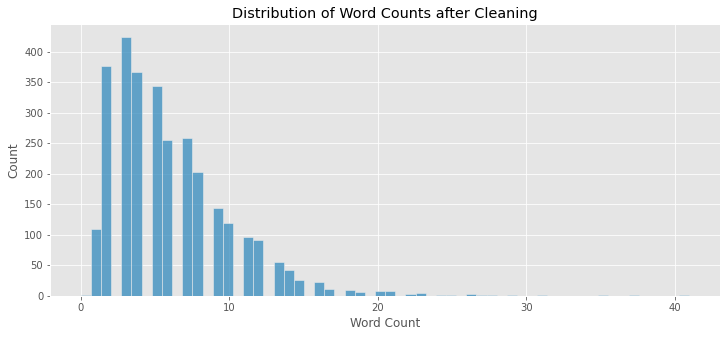

In [ ]:
# View distribution of cleaned review lengths
plt.figure(figsize = (12,5))
sns.histplot(x = 'word_count_clean', data = df)
plt.title("Distribution of Word Counts after Cleaning")
plt.xlabel("Word Count")
plt.ylabel("Count");

In [ ]:
df['word_count_clean'].describe()

count    3000.000000
mean        6.121000
std         4.126423
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        41.000000
Name: word_count_clean, dtype: float64

In [ ]:
# Find value of fences - mainly upper value
q1 = 3
q3 = 8
iqr = q3-q1
upper_fence = q3 + 1.5*iqr
lower_fence = q1 - 1.5*iqr

print("Upper Fence Value: ", round(upper_fence, 0), '\n')
print("Lower Fence Value: ", lower_fence)

Upper Fence Value:  16.0 

Lower Fence Value:  -4.5


In [ ]:
# summary statistics show q1 = 3 and q3 = 8 with a max value of 41 therefore outliers are present
# View counts of lengthy reviews --- reviews greater than 16 words as determined by rounding the upper fence value for outliers
lengthy_reviews = df[df['word_count_clean'] > 16]
lengthy_reviews['word_count_clean'].value_counts().sum()

64

In [ ]:
# Filter df for reviews with reviews with lengths between 1 and 16
df_model = df[(df['word_count_clean'] >= 1) & (df['word_count_clean'] <= 16)]

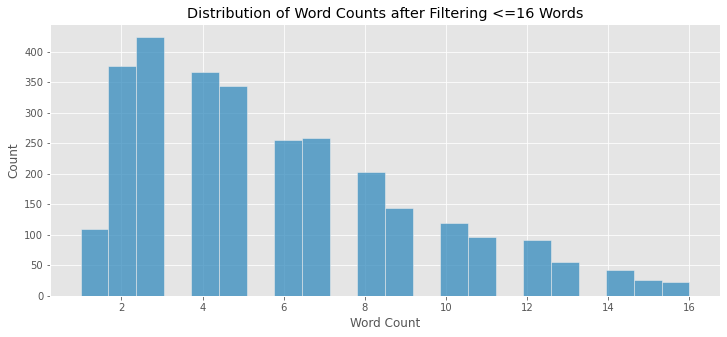

In [ ]:
# View distribution of filtered df
plt.figure(figsize = (12,5))
sns.histplot(x = 'word_count_clean', data = df_model)
plt.title("Distribution of Word Counts after Filtering <=16 Words")
plt.xlabel("Word Count")
plt.ylabel("Count");

In [ ]:
df_model['word_count_clean'].value_counts(ascending = False)

3     424
2     376
4     367
5     343
7     259
6     256
8     202
9     144
10    119
1     110
11     96
12     92
13     55
14     42
15     26
16     23
Name: word_count_clean, dtype: int64

In [ ]:
# Prepare for model, tokenize data
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

clean_review = df_model['clean']

clean_text = []

for sentence in clean_review:
  clean_text.append([word for word in word_tokenize(sentence) if word not in stopwords ])

In [ ]:
# View first 5 reviews as tokenized
clean_text[:5]

[['way', 'plug', 'u', 'unless', 'go', 'converter'],
 ['good', 'case', 'excellent', 'value'],
 ['great', 'jawbone'],
 ['tied', 'charger', 'conversation', 'lasting', 'minutesmajor', 'problem'],
 ['mic', 'great']]

In [ ]:
pip install -U pip keras tensorflow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Define embedding
# Prepare data and parameters
vocab_size = 50000
x_clean = clean_text
y = df_model['sentiment']

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

# Instantiate tokenizer
tokenizer = Tokenizer(num_words = vocab_size)

# Fit tokenizer on text
tokenizer.fit_on_texts(x_clean)

In [ ]:
# Vectorize text to numeric representation
x_vectors = tokenizer.texts_to_sequences(x_clean)


In [ ]:
x_vectors[:5]

[[45, 231, 91, 506, 23, 1825],
 [1, 55, 32, 312],
 [2, 881],
 [1826, 117, 584, 882, 1827, 75],
 [690, 2]]

In [ ]:
# View text and vectorized text
print("original: ", x_clean[:1], '\n')
print("vectorized: ", x_vectors[:1])

original:  [['way', 'plug', 'u', 'unless', 'go', 'converter']] 

vectorized:  [[45, 231, 91, 506, 23, 1825]]


In [ ]:
# #View total count of indexed vectorized words
vocab_len = len(tokenizer.word_index)
print(vocab_len)

4360


In [ ]:
# Define max of clean reviews
max_sent_clean = max(df_model['word_count_clean'])

max_sent_clean

16

In [ ]:
# Import pad sequences
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define max length for padding
max_length = max_sent_clean + 1

x_pad = pad_sequences(x_vectors, maxlen = max_length, padding = 'pre', truncating = 'post')

x_pad.shape

(2934, 17)

In [ ]:
# View padded and vectorized review example compared to clean text
print(x_clean[:1])
print(x_pad[:1])

[['way', 'plug', 'u', 'unless', 'go', 'converter']]
[[   0    0    0    0    0    0    0    0    0    0    0   45  231   91
   506   23 1825]]


In [ ]:
# Split cleaned, vectorized, and padded data into train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_pad, y, train_size = 0.90, test_size = 0.10, random_state = 61, stratify = y)

In [ ]:
# Confirm train test split and shape
print("Training Data Breakdown")
print(X_train.shape)
print(y_train.shape, '\n')
print("Test Data Breakdown")
print(X_test.shape)
print(y_test.shape)

Training Data Breakdown
(2640, 17)
(2640,) 

Test Data Breakdown
(294, 17)
(294,)


In [ ]:
# Make train and test arrays into dataframes in preparation for exporting csv files
X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)

y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

# Export clean and prepared train and test sets
X_train_df.to_csv(r'C:\\Users\\andrew\\Desktop\\WGU_MSDA\\D213_Advanced_Data_Analytics\\PA\\Task_2\\X_train.csv', index = False)
X_test_df.to_csv(r'C:\\Users\\andrew\\Desktop\\WGU_MSDA\\D213_Advanced_Data_Analytics\\PA\\Task_2\\X_test.csv', index = False)

y_train_df.to_csv(r'C:\\Users\\andrew\\Desktop\\WGU_MSDA\\D213_Advanced_Data_Analytics\\PA\\Task_2\\y_train.csv', index = False)
y_test_df.to_csv(r'C:\\Users\\andrew\\Desktop\\WGU_MSDA\\D213_Advanced_Data_Analytics\\PA\\Task_2\\y_test.csv', index = False)

In [ ]:
# #View total count of indexed vectorized words
vocab_len = len(tokenizer.word_index)
print(vocab_len)

4360


In [ ]:
# Define maximum embedding based on 4th root of vocab size
max_sequence_embedding = int(round(np.sqrt(np.sqrt(vocab_len)), 0))
max_sequence_embedding

8

In [ ]:
# Build model using LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D,Bidirectional, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

vocab_len = len(tokenizer.word_counts) + 1
embedding_length = max_sequence_embedding
early_stop = EarlyStopping(monitor = 'val_loss', patience = 5)

# Instantiate model
model= Sequential()

model.add(Embedding(vocab_len, embedding_length, input_length = 17))
model.add(SpatialDropout1D(0.25))
model.add(Bidirectional(LSTM(64, dropout = 0.25, recurrent_dropout = 0.25)))
model.add(Dense(32, activation = 'relu', name = 'dense_layer_32'))
model.add(Dense(1, activation = 'sigmoid', name = 'dense_layer_1'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 17, 8)             34888     
                                                                 
 spatial_dropout1d_5 (Spati  (None, 17, 8)             0         
 alDropout1D)                                                    
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               37376     
 onal)                                                           
                                                                 
 dense_layer_32 (Dense)      (None, 32)                4128      
                                                                 
 dense_layer_1 (Dense)       (None, 1)                 33        
                                                                 
Total params: 76425 (298.54 KB)
Trainable params: 7642

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.10, epochs = 50, batch_size = 32, callbacks = early_stop)

Epoch 1/50
75/75 [==============================] - 11s 38ms/step - loss: 0.6924 - accuracy: 0.5391 - val_loss: 0.6909 - val_accuracy: 0.5114
Epoch 2/50
75/75 [==============================] - 2s 31ms/step - loss: 0.6308 - accuracy: 0.6566 - val_loss: 0.4820 - val_accuracy: 0.7765
Epoch 3/50
75/75 [==============================] - 2s 30ms/step - loss: 0.3647 - accuracy: 0.8468 - val_loss: 0.4199 - val_accuracy: 0.8220
Epoch 4/50
75/75 [==============================] - 2s 30ms/step - loss: 0.2462 - accuracy: 0.9049 - val_loss: 0.4640 - val_accuracy: 0.8144
Epoch 5/50
75/75 [==============================] - 3s 35ms/step - loss: 0.1689 - accuracy: 0.9386 - val_loss: 0.4371 - val_accuracy: 0.8258
Epoch 6/50
75/75 [==============================] - 3s 35ms/step - loss: 0.1425 - accuracy: 0.9512 - val_loss: 0.4175 - val_accuracy: 0.8144
Epoch 7/50
75/75 [==============================] - 3s 35ms/step - loss: 0.1166 - accuracy: 0.9596 - val_loss: 0.4400 - val_accuracy: 0.8220
Epoch 8/50
7

Text(0.5, 1.0, 'Model Loss')

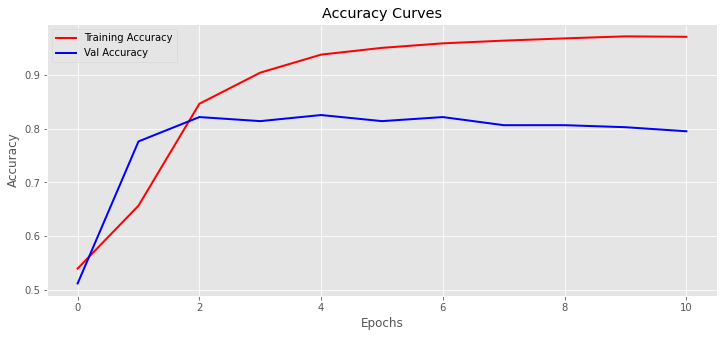

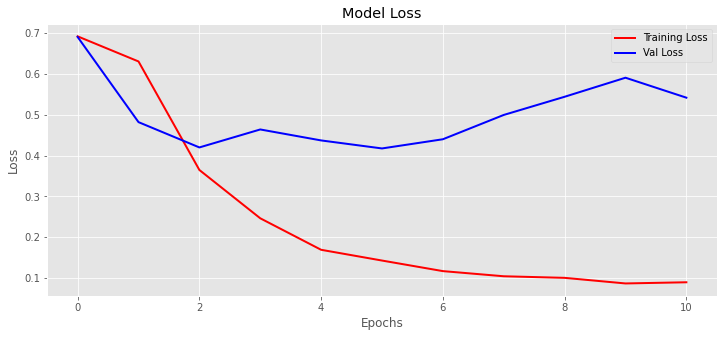

In [ ]:
 # Plotting the accuracy curve
plt.figure(figsize=[12,5])
plt.plot(history.history['accuracy'], 'red', linewidth=2.0, label = "Training Accuracy")
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0, label = "Val Accuracy")
plt.legend(loc = 'best')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Curves')

# Plotting the loss curve
plt.figure(figsize=[12,5])
plt.plot(history.history['loss'], 'red', linewidth=2.0, label = "Training Loss")
plt.plot(history.history['val_loss'], 'blue', linewidth=2.0, label = 'Val Loss')
plt.legend(loc = 'best')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

In [ ]:
# Evaluate model
eval = model.evaluate(X_test, y_test, verbose = 0)

# Isolate accuracy and loss metrics
acc = round(eval[1]*100, 2)
loss = round(eval[0], 3)

# View metrics
print("Test Accuracy: ", acc, '\n')
print("Test Loss: ", loss)

Test Accuracy:  76.19 

Test Loss:  0.756


In [ ]:
# Find labels for predictions using y test data
# Compute predictions
prediction = model.predict(X_test)

# Get labels based on predicted values 1 if p >= 0.5 else 0
pred = []
for p in prediction:
    if p >= 0.5:
        pred.append(1)
    else:
        pred.append(0)



10/10 [==============================] - 1s 7ms/step


In [ ]:
# View predictions
print(prediction[:5])
print(pred[:5])

[[0.9069329 ]
 [0.9474819 ]
 [0.996027  ]
 [0.6259457 ]
 [0.00704312]]
[1, 1, 1, 1, 0]


In [ ]:
from sklearn.metrics import accuracy_score

# Calculate Accuracy score of test predictions
acc_score = accuracy_score(y_test, pred)

print("Accuracy Score: %0.2f" % (acc_score*100) + "%")

Accuracy Score: 76.19%


Confusion Matrix 

[[110  38]
 [ 32 114]]




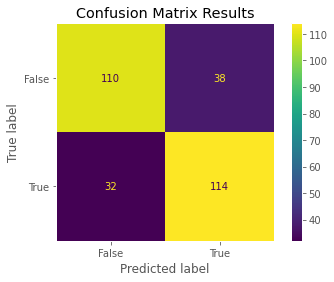

In [ ]:
# Assess metrics
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Run confusion matrix
matrix = confusion_matrix(y_test, pred)

# Print results
print("Confusion Matrix", '\n')
print(matrix)
print('\n')
matrix_visual = metrics.ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])
matrix_visual.plot()
plt.grid(False)
plt.title("Confusion Matrix Results")
plt.show()

In [ ]:
# define true postive, true negative, false positive, false negative variables
tn = matrix[0,0]
fp = matrix[0,1]
fn = matrix[1,0]
tp = matrix[1,1]

print('True Negatives: ' + str(tn))
print('False Negatives: ' + str(fn))
print('True Positives: ' + str(tp))
print('False Positives: ' + str(fp))


True Negatives: 110
False Negatives: 32
True Positives: 114
False Positives: 38


In [ ]:
# Performance Calculations - Accruacy, Precision, Sensitivity/Recall, Specificity
# Population total
population = tp + tn + fp + fn


# Accuracy calculation --- sum true pos + true neg / population
# How often is the model correct?
accuracy = (tp + tn) / population

# Precision calcualtion --- true pos / sum of true pos + false pos
# Of the positives predicted, what percentage is truly positive?
precision = tp / (tp+fp)


# Sensitivity/Recall calculation --- true positivies / sum of true pos + false neg
# Of all the positive cases, what percentage are predicted positive? / how good is model at predicting positive cases
sensitivity = tp / (tp + fn)

# Specificity calculation --- true negatives / sum of true neg + false pos
# How well the model is at prediciting negative results?
specificity = tn / (tn + fp)


print("Accuracy: %0.2f" % (accuracy*100) + " %")
print("Precision:  %0.2f" % (precision*100) + " %")
print("Sensitivity/Recall: %0.2f" % (sensitivity*100) + " %")
print("Specificity: %0.2f" % (specificity*100) + " %")


Accuracy: 76.19 %
Precision:  75.00 %
Sensitivity/Recall: 78.08 %
Specificity: 74.32 %


In [ ]:
# Save model to hierarchal format
model.save(r'C:\Users\andrew\Desktop\WGU_MSDA\D213_Advanced_Data_Analytics\PA\Task_2\sentiment_reveiw_model.h5')

In [ ]:
# For model recreation
reanimate_model = tf.keras.models.load_model(r'C:\Users\andrew\Desktop\WGU_MSDA\D213_Advanced_Data_Analytics\PA\Task_2\sentiment_reveiw_model.h5')

In [ ]:
# Show the reanimated model structure
reanimate_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 17, 8)             34888     
                                                                 
 spatial_dropout1d_5 (Spati  (None, 17, 8)             0         
 alDropout1D)                                                    
                                                                 
 bidirectional_5 (Bidirecti  (None, 128)               37376     
 onal)                                                           
                                                                 
 dense_layer_32 (Dense)      (None, 32)                4128      
                                                                 
 dense_layer_1 (Dense)       (None, 1)                 33        
                                                                 
Total params: 76425 (298.54 KB)
Trainable params: 7642

In [ ]:
##################################### END